In [1]:
import pandas as pd
# 용량이 크니 마운트
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("./drive/MyDrive/BDA(ML)/수)BDA_추천알고리즘/과제/dataset/2019-Dec.csv")

Mounted at /content/drive


- 필수과제1
    - 스코어링의 분포를 살펴보고 해당 스코어 점수를 정규화할 수 있는 방법은 무엇이 있을까!?

       - 1.1
        - 스코어에 대한 분포도 확인하여, 한쪽에 치우친 분포인지도 체크하기!

      - 필수과제1.2
        ▪ softmax함수를 통해스 스코어링을 재정의하고 다시 점수를 출력해 주세요!


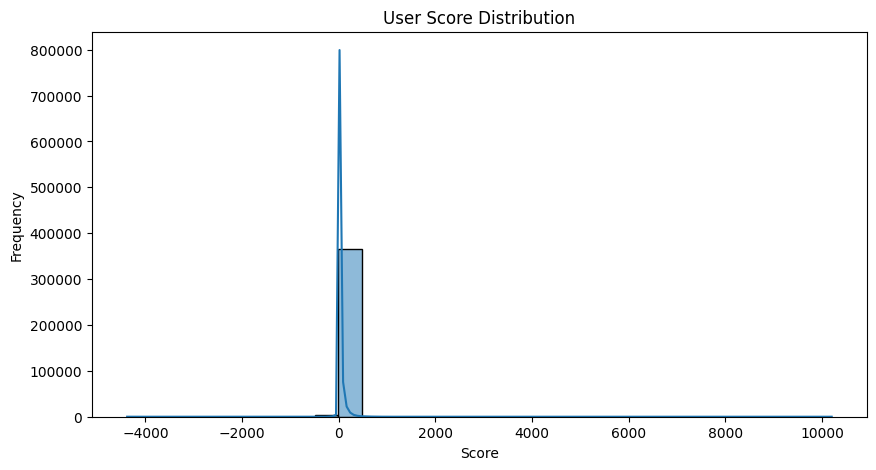

Skewness: 37.30265653749893


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# 데이터 예시
data = {
    "event_type": ["view", "cart", "remove_from_cart", "purchase"],
    "weight": [1, 3, -2, 5]  # 가중치 부여
}
event_score_map = pd.DataFrame(data).set_index("event_type")["weight"].to_dict()

# 사용자별 스코어 계산
df["score"] = df["event_type"].map(event_score_map)
user_scores = df.groupby("user_id")["score"].sum().dropna()

# 분포 시각화
plt.figure(figsize=(10, 5))
sns.histplot(user_scores, bins=30, kde=True)
plt.title("User Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

# 왜도 확인
print(f"Skewness: {skew(user_scores)}")


In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max 정규화
minmax_scaler = MinMaxScaler()
user_scores_minmax = minmax_scaler.fit_transform(user_scores.values.reshape(-1, 1))

# Z-score 정규화
zscore_scaler = StandardScaler()
user_scores_zscore = zscore_scaler.fit_transform(user_scores.values.reshape(-1, 1))

# Log 변환 (음수 방지를 위해 shift 적용)
user_scores_log = np.log1p(user_scores - user_scores.min() + 1)


In [5]:
# 1 사용자별 스코어 합산 (이전 단계에서 정의한 user_scores 사용)
user_scores = df.groupby("user_id")["score"].sum().dropna()

# 2️ Softmax 변환
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # 오버플로우 방지를 위해 최대값을 빼줌
    return exp_x / np.sum(exp_x)

softmax_scores = softmax(user_scores.values)

# 3️ 결과 출력
user_scores_df = pd.DataFrame({
    "user_id": user_scores.index,
    "original_score": user_scores.values,
    "softmax_score": softmax_scores
})

print(user_scores_df.head())  # 상위 5개 출력


   user_id  original_score  softmax_score
0  1180452               1            0.0
1  2963072              38            0.0
2  4661182               5            0.0
3  4891613               1            0.0
4  6217356               1            0.0
